In [21]:
import numpy as np
import matplotlib.pyplot as plt

In this kernel, I will implement a few gradient descent techniques.

The main function for me to optimize will be $$a^T\vec{x}=\vec{y}$$. The goal for SGD is to optimize $a$, such that it has the smallest loss. Here, $x$ and $y$ will be randomly decided. $x$ will be a matrix of $5000\times30$.

## Generate Data
We will first generate the bias matrix ($a$), then $x$. $y$ will be acquired by $a^Tx$

In [75]:
a = np.random.randint(1,10000, size=100)
print(a)

[1430 3850 5648 4367 4363 1962 5762 6793  774 3129 6884 7927 2186 2802
 5505 8225 3693 2870 8940 4301 1570  787 7338 7314 4207 2602 3419 5234
 9437 9872 7455 2553  645 6050 7391 2526 9474 8963 3008 7390  465 2556
 3162 3991 8864 4153 7976 6950 2636 2934 6886 7659 7603 5286 6707 2900
 3434 3754 3603 2874 6785 7397 9187 6599 1834  942 6434 5896 1821 8180
 2027 5445 9723 2142  738 9724 4054 8878 5447 8698 3545 3992 1158 3200
 6224 3984 9621  865 6265  658 6647 1983 3094 5038 2001  454 2878 1987
  616 7871]


In [76]:
x = np.random.randn(20000,100)
x

array([[-0.37075035, -0.91197099,  0.89154802, ...,  0.73599573,
         1.29935704, -0.46618493],
       [ 0.23587862,  0.16087673, -0.3859583 , ..., -0.30686093,
        -1.06823188, -0.71587608],
       [ 0.39458593, -0.59904851, -0.1008914 , ...,  0.38214607,
        -0.59972414, -1.094637  ],
       ...,
       [-0.24346001,  1.22900398,  0.89685907, ...,  0.15058909,
        -0.65333525, -1.85719398],
       [ 0.7336436 , -0.06278063,  0.94759201, ...,  0.11711587,
        -1.15624659, -0.75118594],
       [ 0.70682426, -0.48667389,  0.05296054, ..., -0.28594956,
         0.22565602, -1.59264317]])

In [77]:
y = np.zeros(20000)
for i in range(len(y)):
    y[i] = np.dot(a,x[i])
y

array([ 22591.35388858,  39057.9468175 , -35418.14686145, ...,
         3173.76795935,  -3548.10155834,   3044.33153944])

The above is the data generated for our Gradient Descent problem. Lets move on

## Loss Function and Hyper params

In [78]:
def loss(y,predict):
    summed = 1/(len(x)) * np.sum((predict-y)**2)
    return summed

alpha = 0.001

In [87]:
theta = np.zeros(100)
cost = 1
hist_cost = []
printed = True

import time
start = time.time()
ite = 0 
while cost > 0.00001:
    ite +=1
    for j in range(100):
        theta[j] = theta[j] - alpha / len(x) *np.sum(  (x @ theta.T - y) @ x[:,j], axis=0)
        
    cost = loss(y, x @ theta.T)
    hist_cost.append(cost)
    if ite % 1000 == 0:
        print("iter:",end='')
        print(ite)
        print("cost",end='')
        print(cost)
    if cost <= 1 and printed:
        printed = False
        print("iterations to reach cost < 1")
        print(len(hist_cost))
        

end = time.time()


print("iterations spent to find optimum:")
print(len(hist_cost))
print("time spent")
print(end - start)

iter:1000
cost404738711.7480242
iter:2000
cost54783745.971608646
iter:3000
cost7560788.582976928
iter:4000
cost1063226.8074276764
iter:5000
cost152199.36508150303
iter:6000
cost22152.697645343436
iter:7000
cost3274.2773604134572
iter:8000
cost490.8047072846749
iter:9000
cost74.51474597654853
iter:10000
cost11.443964567522594
iter:11000
cost1.7758578761611994
iterations to reach cost < 1
11310
iter:12000
cost0.27814805162902695
iter:13000
cost0.04393013264918493
iter:14000
cost0.006990257776670096
iter:15000
cost0.0011197831784630255
iter:16000
cost0.00018046276911929242
iter:17000
cost2.9240874482493696e-05
iterations spent to find optimum:
17591
time spent
371.24827671051025


Lets see how close $\theta$ and the real $a$ is

In [91]:
print(theta)
print(a)
print(sum(theta-a))

[1430.00000401 3850.00022235 5647.99996937 4367.00006695 4363.00047009
 1962.00006897 5761.99992474 6792.99989641  773.99972891 3128.99971262
 6883.99997556 7927.00009965 2185.9998544  2802.00006615 5504.99984125
 8224.99973813 3692.99937934 2869.9998837  8939.99967722 4300.99989305
 1570.00044599  787.00002547 7337.9998861  7313.99965535 4206.99955709
 2601.99974976 3419.00004147 5233.99991073 9436.99961808 9871.99924313
 7454.99935308 2553.0002172   645.00016376 6049.99943143 7390.99937811
 2525.99985462 9473.99965999 8962.99954246 3008.00011265 7389.99983581
  465.0000358  2556.00011375 3161.99994894 3990.9994463  8863.99942413
 4152.99993709 7975.99965022 6949.99963577 2635.99951898 2933.99977057
 6885.99991714 7658.99956332 7603.00020793 5285.99978823 6706.99977976
 2899.99989217 3433.99991583 3754.0000328  3603.000182   2873.99977553
 6784.99982053 7396.99969192 9186.99973042 6598.99994235 1834.00063642
  941.99986889 6433.99989203 5895.99965126 1820.99979723 8179.9997728
 2026.9

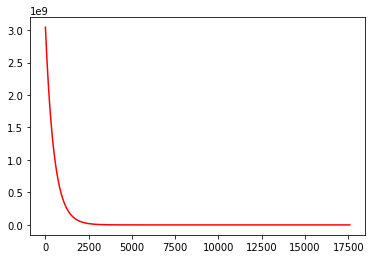

In [90]:
plt.plot(np.arange(len(hist_cost)),hist_cost,'r')

The computers nowadays are really amazing, my computer done $17591 \times 20000 \times 100$ in 370 seconds, which is about 37.5 billion calculations to reach a cost less than 0.00001. It did nearly 95 million calculations in 1 second....